In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the data

In [102]:
df = pd.read_csv("spx_cons_norm.csv")
df.head()

,iid,gvkey,tic,datadate,industry_id,trt1m,adj_close,abnormal_volume,MA3,MA6,...,ev_ebitda,NCFP,year,forward_ret,yearmonth,sp500_prc,sp500_ret,forward_return,excess_ret,forward_excess_ret
0,4,1045,AAL,20150331,20,10.1879,53.154548,0.180608,-0.160682,2.611149,...,-0.661440,-0.080760,NaN,-8.3270,201503,2067.89,-0.017396,-8.3270,10.205296,-8.3270
1,1,1075,PNW,20150331,55,-0.5150,78.822695,-0.014700,-0.196723,1.206423,...,-0.335553,-0.056352,NaN,-3.0667,201503,2067.89,-0.017396,-3.0667,-0.497604,-3.0667
2,1,1078,ABT,20150331,35,-2.1955,106.512358,0.000808,-0.489384,-0.483743,...,0.061642,0.344246,NaN,0.7123,201503,2067.89,-0.017396,0.7123,-2.178104,0.7123
3,1,1177,AET,20150331,35,7.0116,106.711729,0.016547,1.044814,0.782411,...,NaN,NaN,NaN,0.5538,201503,2067.89,-0.017396,0.5538,7.028996,0.5538
4,1,1209,APD,20150331,15,-2.5938,163.090181,-0.031170,0.210246,0.763691,...,0.385306,0.334992,NaN,-5.1891,201503,2067.89,-0.017396,-5.1891,-2.576404,-5.1891


In [73]:
df.iloc[0]

iid                           4
gvkey                      1045
tic                         AAL
datadate               20150331
industry_id                  20
trt1m                   10.1879
adj_close               53.1545
abnormal_volume        0.180608
MA3                   -0.160682
MA6                     2.61115
MA12                    1.64835
EMA3                    1.92199
EMA6                    2.29442
EMA12                   2.92697
NI_growth               4.87265
Size                    0.79311
PriceCap              -0.916455
ROE                      1.4611
ROA                    -0.36735
ROI                   -0.414604
NetPM                 -0.629097
epspi12               -0.230209
earnings               0.277707
earningsVol             2.29279
Asset Turnover        0.0130102
PE                    -0.907233
PB                     0.228185
PS                    -0.991275
dividend_yield         -1.27215
ev_ebitda              -0.66144
NCFP                 -0.0807603
year    

# Deal with the missing values

In [74]:
df.isnull().sum()

iid                       0
gvkey                     0
tic                       0
datadate                  0
industry_id               0
trt1m                     7
adj_close                 7
abnormal_volume        5704
MA3                    1042
MA6                    2601
MA12                   5706
EMA3                      7
EMA6                      7
EMA12                     7
NI_growth               285
Size                      4
PriceCap                  4
ROE                      94
ROA                     183
ROI                     117
NetPM                  2471
epspi12                 128
earnings                 17
earningsVol             602
Asset Turnover         2551
PE                     1389
PB                        8
PS                       93
dividend_yield         5694
ev_ebitda              6365
NCFP                   5363
year                  58890
forward_ret             700
yearmonth                 0
sp500_prc                 0
sp500_ret           

In [75]:
df = pd.concat([df, pd.get_dummies(df['industry_id'])], axis=1); df

,iid,gvkey,tic,datadate,industry_id,trt1m,adj_close,abnormal_volume,MA3,MA6,...,15,20,25,30,35,40,45,50,55,60
0,4,1045,AAL,20150331,20,10.1879,53.154548,0.180608,-0.160682,2.611149,...,0,1,0,0,0,0,0,0,0,0
1,1,1075,PNW,20150331,55,-0.5150,78.822695,-0.014700,-0.196723,1.206423,...,0,0,0,0,0,0,0,0,1,0
2,1,1078,ABT,20150331,35,-2.1955,106.512358,0.000808,-0.489384,-0.483743,...,0,0,0,0,1,0,0,0,0,0
3,1,1177,AET,20150331,35,7.0116,106.711729,0.016547,1.044814,0.782411,...,0,0,0,0,1,0,0,0,0,0
4,1,1209,APD,20150331,15,-2.5938,163.090181,-0.031170,0.210246,0.763691,...,1,0,0,0,0,0,0,0,0,0
5,1,1300,HON,20150331,20,1.4886,116.522578,0.008693,0.581755,0.373708,...,0,1,0,0,0,0,0,0,0,0
6,1,1327,SWKS,20150331,45,12.0114,88.595360,0.330804,2.169595,2.889197,...,0,0,0,0,0,0,1,0,0,0
7,1,1356,AA.3,20150331,15,-12.6437,10.798615,0.189494,-2.012015,-1.431380,...,1,0,0,0,0,0,0,0,0,0
8,1,1380,HES,20150331,10,-9.2701,67.804645,0.015698,-0.330032,-0.519735,...,0,0,0,0,0,0,0,0,0,0
9,1,1440,AEP,20150331,55,-2.3098,70.791544,0.006484,-0.387305,0.274647,...,0,0,0,0,0,0,0,0,1,0


In [76]:
df = df.dropna(subset=['forward_excess_ret'])
df.isnull().sum()

iid                       0
gvkey                     0
tic                       0
datadate                  0
industry_id               0
trt1m                     6
adj_close                 6
abnormal_volume        5682
MA3                    1035
MA6                    2591
MA12                   5683
EMA3                      6
EMA6                      6
EMA12                     6
NI_growth               281
Size                      4
PriceCap                  4
ROE                      90
ROA                     179
ROI                     117
NetPM                  2443
epspi12                 127
earnings                 17
earningsVol             591
Asset Turnover         2523
PE                     1376
PB                        8
PS                       89
dividend_yield         5673
ev_ebitda              6308
NCFP                   5325
year                  58189
forward_ret             491
yearmonth                 0
sp500_prc                 0
sp500_ret           

In [77]:
df.columns

Index([               'iid',              'gvkey',                'tic',
                 'datadate',        'industry_id',              'trt1m',
                'adj_close',    'abnormal_volume',                'MA3',
                      'MA6',               'MA12',               'EMA3',
                     'EMA6',              'EMA12',          'NI_growth',
                     'Size',           'PriceCap',                'ROE',
                      'ROA',                'ROI',              'NetPM',
                  'epspi12',           'earnings',        'earningsVol',
           'Asset Turnover',                 'PE',                 'PB',
                       'PS',     'dividend_yield',          'ev_ebitda',
                     'NCFP',               'year',        'forward_ret',
                'yearmonth',          'sp500_prc',          'sp500_ret',
           'forward_return',         'excess_ret', 'forward_excess_ret',
                         10,                   15, 

In [78]:
X = df[['tic','ROE','Asset Turnover','EMA6','earningsVol','PS','ev_ebitda',10,15,20,25,35,45,55,30,40,50,60]]
X

,tic,ROE,Asset Turnover,EMA6,earningsVol,PS,ev_ebitda,10,15,20,25,35,45,55,30,40,50,60
0,AAL,1.461096,0.013010,2.294422,2.292786,-0.991275,-0.661440,0,0,1,0,0,0,0,0,0,0,0
1,PNW,0.123717,-0.843595,0.702078,-0.555007,0.480105,-0.335553,0,0,0,0,0,0,1,0,0,0,0
2,ABT,-0.009341,-0.479049,-0.701996,0.451474,-0.194007,0.061642,0,0,0,0,1,0,0,0,0,0,0
3,AET,0.929243,0.188733,0.943852,-0.244918,-0.600976,NaN,0,0,0,0,1,0,0,0,0,0,0
4,APD,-0.280991,-0.570850,0.783532,-0.509185,0.950357,0.385306,0,1,0,0,0,0,0,0,0,0,0
5,HON,-0.139148,-0.124280,0.350377,0.207268,0.112171,0.319353,0,0,1,0,0,0,0,0,0,0,0
6,SWKS,-0.700738,0.964009,3.759825,-0.379943,1.648364,0.333165,0,0,0,0,0,1,0,0,0,0,0
7,AA.3,-0.760498,-0.383503,-1.177510,1.431285,-1.067588,-0.899573,0,1,0,0,0,0,0,0,0,0,0
8,HES,0.493583,-0.550465,-0.193550,0.202278,-0.179839,-0.789356,1,0,0,0,0,0,0,0,0,0,0
9,AEP,0.289481,-0.396252,0.087728,-0.192735,-0.024055,-0.423984,0,0,0,0,0,0,1,0,0,0,0


In [79]:
X.isnull().sum()

tic                  0
ROE                 90
Asset Turnover    2523
EMA6                 6
earningsVol        591
PS                  89
ev_ebitda         6308
10                   0
15                   0
20                   0
25                   0
35                   0
45                   0
55                   0
30                   0
40                   0
50                   0
60                   0
dtype: int64

In [80]:
X = X.set_index('tic', append=True)

In [81]:
X.isnull().sum()

ROE                 90
Asset Turnover    2523
EMA6                 6
earningsVol        591
PS                  89
ev_ebitda         6308
10                   0
15                   0
20                   0
25                   0
35                   0
45                   0
55                   0
30                   0
40                   0
50                   0
60                   0
dtype: int64

In [82]:
X = X.groupby(level=1).ffill()
X.isnull().sum()

tic                  0
ROE                  3
Asset Turnover    2351
EMA6                 0
earningsVol         82
PS                   3
ev_ebitda         2725
10                   0
15                   0
20                   0
25                   0
35                   0
45                   0
55                   0
30                   0
40                   0
50                   0
60                   0
dtype: int64

In [83]:
X = X.fillna(X.mean())
X.isnull().sum()

tic               0
ROE               0
Asset Turnover    0
EMA6              0
earningsVol       0
PS                0
ev_ebitda         0
10                0
15                0
20                0
25                0
35                0
45                0
55                0
30                0
40                0
50                0
60                0
dtype: int64

In [85]:
X = X[['ROE','Asset Turnover','EMA6','earningsVol','PS','ev_ebitda',10,15,20,25,35,45,55,30,40,50,60]]
X

,,ROE,Asset Turnover,EMA6,earningsVol,PS,ev_ebitda,10,15,20,25,35,45,55,30,40,50,60
,tic,,,,,,,,,,,,,,,,,
0,AAL,1.461096,0.013010,2.294422,2.292786,-0.991275,-0.661440,0,0,1,0,0,0,0,0,0,0,0
1,PNW,0.123717,-0.843595,0.702078,-0.555007,0.480105,-0.335553,0,0,0,0,0,0,1,0,0,0,0
2,ABT,-0.009341,-0.479049,-0.701996,0.451474,-0.194007,0.061642,0,0,0,0,1,0,0,0,0,0,0
3,AET,0.929243,0.188733,0.943852,-0.244918,-0.600976,-0.203692,0,0,0,0,1,0,0,0,0,0,0
4,APD,-0.280991,-0.570850,0.783532,-0.509185,0.950357,0.385306,0,1,0,0,0,0,0,0,0,0,0
5,HON,-0.139148,-0.124280,0.350377,0.207268,0.112171,0.319353,0,0,1,0,0,0,0,0,0,0,0
6,SWKS,-0.700738,0.964009,3.759825,-0.379943,1.648364,0.333165,0,0,0,0,0,1,0,0,0,0,0
7,AA.3,-0.760498,-0.383503,-1.177510,1.431285,-1.067588,-0.899573,0,1,0,0,0,0,0,0,0,0,0
8,HES,0.493583,-0.550465,-0.193550,0.202278,-0.179839,-0.789356,1,0,0,0,0,0,0,0,0,0,0


In [86]:
X = X.values
X

array([[ 1.46109602,  0.01301025,  2.29442248, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12371666, -0.84359491,  0.70207808, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00934123, -0.4790488 , -0.70199625, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.31456099,  3.8498746 , -1.63289589, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.13660037,  2.54395934, -0.63511672, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43693772,  0.14080992,  0.30798203, ...,  0.        ,
         0.        ,  0.        ]])

In [87]:
y =df[['forward_excess_ret']].values
y

array([[-8.327 ],
       [-3.0667],
       [ 0.7123],
       ...,
       [ 5.9369],
       [ 9.5082],
       [ 6.8876]])

In [89]:
X.shape

(58189, 17)

# Train Test Split

In [90]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, KFold
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state= 52)
X_train.shape

(40732, 17)

# SVR 

In [91]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline


SVR_m = SVR()
param_grid0 = {'C': [0.01, 0.1], 'epsilon':[0.2,0.3]}
grid_search0 = GridSearchCV(SVR_m, scoring = 'neg_mean_squared_error',param_grid = param_grid0, cv=5, return_train_score=True)

grid_search0.fit(X_train, Y_train.ravel()) 

print("Scores on training set:")
means = grid_search0.cv_results_['mean_test_score']
stds = grid_search0.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search0.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

Scores on training set:
-59.579 (+/-2.733) for {'C': 0.01, 'epsilon': 0.2}
-59.580 (+/-2.731) for {'C': 0.01, 'epsilon': 0.3}
-59.615 (+/-2.713) for {'C': 0.1, 'epsilon': 0.2}
-59.615 (+/-2.711) for {'C': 0.1, 'epsilon': 0.3}


In [92]:
print(grid_search0.cv_results_) 
print(grid_search0.best_params_)

{'mean_fit_time': array([80.28800511, 79.41028605, 87.61023769, 72.785146  ]), 'std_fit_time': array([2.18741238, 7.80059623, 8.94608721, 5.97152538]), 'mean_score_time': array([12.3345592 , 12.29016714, 13.85380745, 11.01792493]), 'std_score_time': array([0.57968277, 1.84121483, 1.58433465, 1.4409184 ]), 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_epsilon': masked_array(data=[0.2, 0.3, 0.2, 0.3],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01, 'epsilon': 0.2}, {'C': 0.01, 'epsilon': 0.3}, {'C': 0.1, 'epsilon': 0.2}, {'C': 0.1, 'epsilon': 0.3}], 'split0_test_score': array([-57.14719821, -57.14792145, -57.19252108, -57.19433227]), 'split1_test_score': array([-59.91370788, -59.91458626, -59.89122079, -59.89484529]), 'split2_test_score': array([-59.50745412, -59.50991411, -59.62662511, -59.62383989]), 'sp

In [93]:
SVR_f = grid_search0.best_estimator_.fit(X_train, Y_train.ravel())

y_hat0 = SVR_f.predict(X_test)
svm_score = SVR_f.score(X_test, Y_test)
svm_score

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


8.441590799679322e-05

# Decision Tree

In [94]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)

param_grid2 = {"criterion" : ["mse"],
              "max_depth" :   [2,3,4],
               'min_samples_split' : [2,5,10]
             }

grid_search3 = GridSearchCV(tree, param_grid=param_grid2,scoring='neg_mean_squared_error', cv=5, return_train_score = True)
grid_search3.fit(X_train, Y_train.ravel()) 

print("Scores on training set:")
means = grid_search3.cv_results_['mean_test_score']
stds = grid_search3.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search3.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print(grid_search3.best_params_)

Scores on training set:
-59.673 (+/-2.683) for {'criterion': 'mse', 'max_depth': 2, 'min_samples_split': 2}
-59.672 (+/-2.628) for {'criterion': 'mse', 'max_depth': 2, 'min_samples_split': 5}
-59.673 (+/-2.632) for {'criterion': 'mse', 'max_depth': 2, 'min_samples_split': 10}
-59.784 (+/-2.437) for {'criterion': 'mse', 'max_depth': 3, 'min_samples_split': 2}
-59.728 (+/-2.563) for {'criterion': 'mse', 'max_depth': 3, 'min_samples_split': 5}
-59.715 (+/-2.570) for {'criterion': 'mse', 'max_depth': 3, 'min_samples_split': 10}
-59.890 (+/-2.432) for {'criterion': 'mse', 'max_depth': 4, 'min_samples_split': 2}
-59.846 (+/-2.579) for {'criterion': 'mse', 'max_depth': 4, 'min_samples_split': 5}
-59.748 (+/-2.511) for {'criterion': 'mse', 'max_depth': 4, 'min_samples_split': 10}
{'criterion': 'mse', 'max_depth': 2, 'min_samples_split': 5}


In [95]:
print(grid_search3.cv_results_) 
print(grid_search3.best_params_)

{'mean_fit_time': array([0.09916992, 0.07398105, 0.07690873, 0.11097527, 0.10674157,
       0.1132144 , 0.15655971, 0.15825067, 0.14611235]), 'std_fit_time': array([0.04353165, 0.00189297, 0.00420623, 0.00377688, 0.00302149,
       0.00508987, 0.00639626, 0.01225943, 0.00435561]), 'mean_score_time': array([0.00117102, 0.00117187, 0.00117097, 0.00097861, 0.0011713 ,
       0.00097599, 0.00156121, 0.00136619, 0.00176101]), 'std_score_time': array([3.90459224e-04, 3.89911333e-04, 3.89170658e-04, 5.29825952e-06,
       3.91030788e-04, 3.23406696e-07, 4.78241269e-04, 4.78650327e-04,
       3.92433690e-04]), 'param_criterion': masked_array(data=['mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse', 'mse',
                   'mse'],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
             mask=[False, False, False, False, Fals

In [96]:
DT = grid_search3.best_estimator_.fit(X_train, Y_train.ravel())

y_hat1 = DT.predict(X_test)
DT_score = DT.score(X_test, Y_test)
DT_score

-0.002899076371391418

# Investigating the predictions

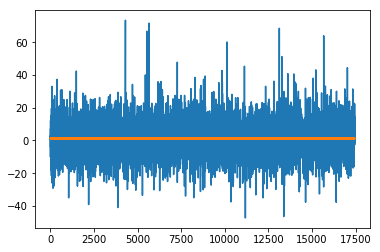

In [100]:
plt.plot(Y_test)
plt.plot(y_hat0)

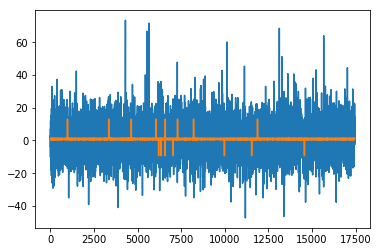

In [101]:
plt.plot(Y_test)
plt.plot(y_hat1)